In [2]:
!pip install pandas numpy textblob vaderSentiment transformers matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import string
import re

In [4]:
# Data Preprocessing Function
def clean_text(text):
    """ Clean and preprocess text data """
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = " ".join(text.split())
    return text

In [5]:
# Sentiment Analysis Using TextBlob
def textblob_sentiment(text):
    """ Perform sentiment analysis using TextBlob """
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [6]:
# Sentiment Analysis Using VADER
def vader_sentiment(text):
    """ Perform sentiment analysis using VADER """
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

In [7]:
# Sentiment Analysis Using Hugging Face (DistilBERT)
def transformers_sentiment(text):
    """ Perform sentiment analysis using Hugging Face's DistilBERT model """
    sentiment_analyzer = pipeline("sentiment-analysis")
    result = sentiment_analyzer(text)
    return 1 if result[0]['label'] == 'POSITIVE' else -1

In [8]:
# Example Data: Simulate some review data
data = {
    'review': [
        "I love this product! It's absolutely amazing.",
        "This is the worst service I have ever received.",
        "I'm not sure how I feel about this item.",
        "Highly recommend this! It changed my life.",
        "Terrible experience, will never buy again."
    ]
}

In [9]:
# Create DataFrame
df = pd.DataFrame(data)


In [10]:
# Clean the text data
df['cleaned_review'] = df['review'].apply(clean_text)

In [12]:
# Sentiment Analysis using TextBlob, VADER, and Transformers
df['textblob_sentiment'] = df['cleaned_review'].apply(textblob_sentiment)
df['vader_sentiment'] = df['cleaned_review'].apply(vader_sentiment)
df['transformers_sentiment'] = df['cleaned_review'].apply(transformers_sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied

In [14]:
# Categorize Sentiment (TextBlob and VADER)
df['textblob_label'] = df['textblob_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
df['vader_label'] = df['vader_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [15]:
# Display the DataFrame
print(df[['review', 'textblob_sentiment', 'vader_sentiment', 'transformers_sentiment', 'textblob_label', 'vader_label']])

                                            review  textblob_sentiment  \
0    I love this product! It's absolutely amazing.                0.55   
1  This is the worst service I have ever received.               -1.00   
2         I'm not sure how I feel about this item.               -0.25   
3       Highly recommend this! It changed my life.                0.16   
4       Terrible experience, will never buy again.               -1.00   

   vader_sentiment  transformers_sentiment textblob_label vader_label  
0           0.8516                       1       Positive    Positive  
1          -0.6249                      -1       Negative    Negative  
2          -0.2411                      -1       Negative    Negative  
3           0.4201                       1       Positive    Positive  
4          -0.4767                      -1       Negative    Negative  


<ipython-input-16-aa7db5fb7714>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='textblob_label', data=df, palette='Set1')


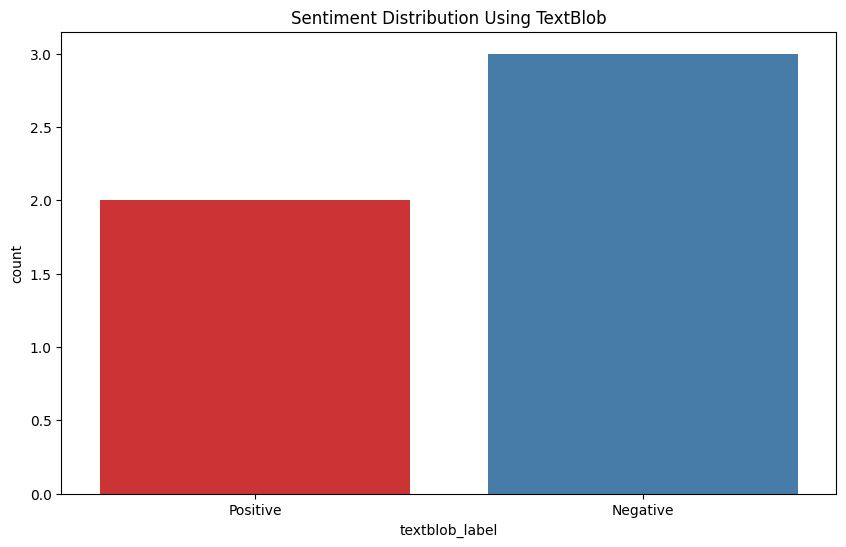

<ipython-input-16-aa7db5fb7714>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_label', data=df, palette='Set2')


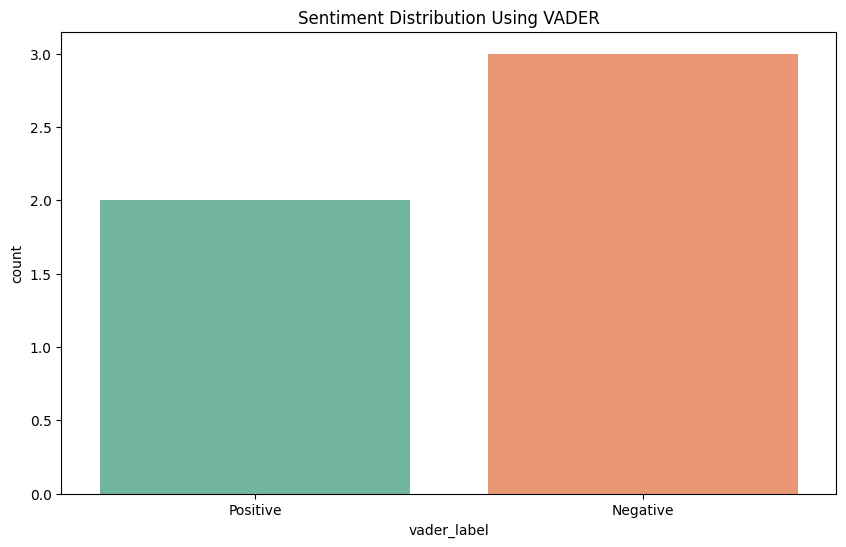

In [16]:
# Plot Sentiment Distribution for TextBlob and VADER
plt.figure(figsize=(10, 6))
sns.countplot(x='textblob_label', data=df, palette='Set1')
plt.title('Sentiment Distribution Using TextBlob')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='vader_label', data=df, palette='Set2')
plt.title('Sentiment Distribution Using VADER')
plt.show()

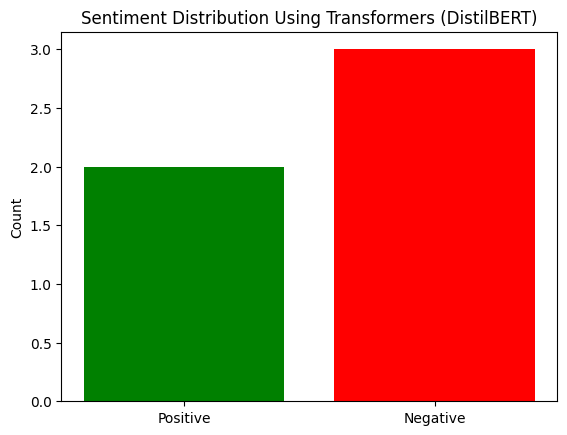

In [17]:
# Show bar plot for Transformers Sentiment
transformers_positive = df[df['transformers_sentiment'] == 1].shape[0]
transformers_negative = df[df['transformers_sentiment'] == -1].shape[0]

labels = ['Positive', 'Negative']
values = [transformers_positive, transformers_negative]

plt.bar(labels, values, color=['green', 'red'])
plt.title('Sentiment Distribution Using Transformers (DistilBERT)')
plt.ylabel('Count')
plt.show()

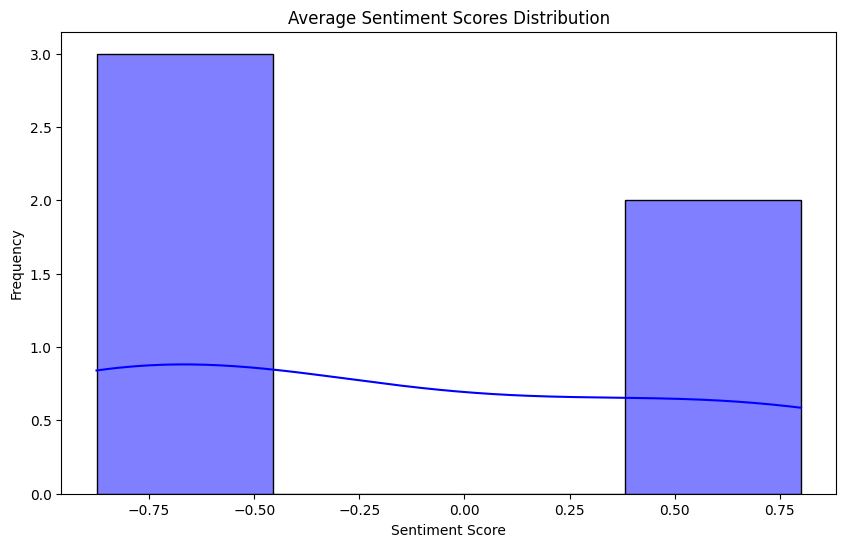

In [18]:
# Calculate Sentiment Score Distribution
df['sentiment_score_avg'] = df[['textblob_sentiment', 'vader_sentiment', 'transformers_sentiment']].mean(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score_avg'], kde=True, color='blue')
plt.title('Average Sentiment Scores Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()